In [188]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [189]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [190]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [191]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d',	'price_change_percentage_30d',	'price_change_percentage_60d',	'price_change_percentage_200d',	'price_change_percentage_1y']])

market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [192]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled, 
    columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d',	'price_change_percentage_30d',	'price_change_percentage_60d',	'price_change_percentage_200d',	'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [193]:
# Creates a list with the number of k-values to try, 
# using a range from 1 to 11

k = list(range(1, 11))

# Creates an empty list to store the inertia values
inertia = []

# For loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. KMeans model uses the loop counter for the n_clusters
# 2. Fits the model to the data using the scaled DataFrame
# 3. Appends the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_scaled)
    inertia.append(k_model.inertia_)

# Dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(8)


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694


<Axes: title={'center': 'Elbow Curve for Cluster Analysis'}, xlabel='k'>

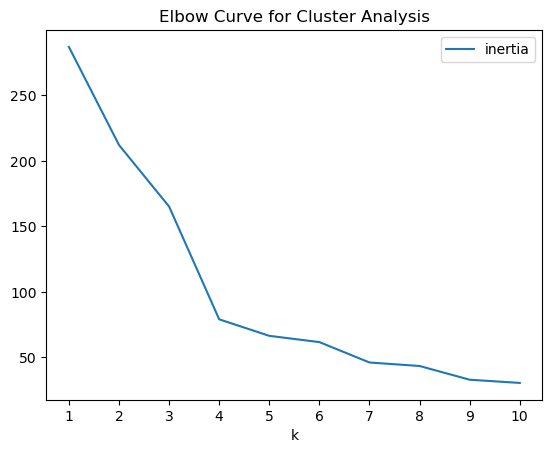

In [194]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for Cluster Analysis',
    xticks=k
)

In [195]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 26.09%
Percentage decrease from k=2 to k=3: 22.15%
Percentage decrease from k=3 to k=4: 52.15%
Percentage decrease from k=4 to k=5: 15.96%
Percentage decrease from k=5 to k=6: 7.20%
Percentage decrease from k=6 to k=7: 25.25%
Percentage decrease from k=7 to k=8: 5.82%
Percentage decrease from k=8 to k=9: 24.15%
Percentage decrease from k=9 to k=10: 7.43%


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Without using PCA, the KMeans algorithm clusters result in some difficult choices about the best values for 'k'. We see a steep dropoff between points 3 and 4 and then a gradual drop from 4 to 5. I'd likely plot the data with a value of `4` for `k` if I were using KMeans on its own.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [196]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [197]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [198]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k4_clusters = model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
print(k4_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [199]:
# Create a copy of the DataFrame
df_k4_crypto_predictions = df_market_data_scaled.copy()

In [200]:
# Add a new column to the DataFrame with the predicted clusters
df_k4_crypto_predictions['Predictions'] = k4_clusters

# Display sample data
df_k4_crypto_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

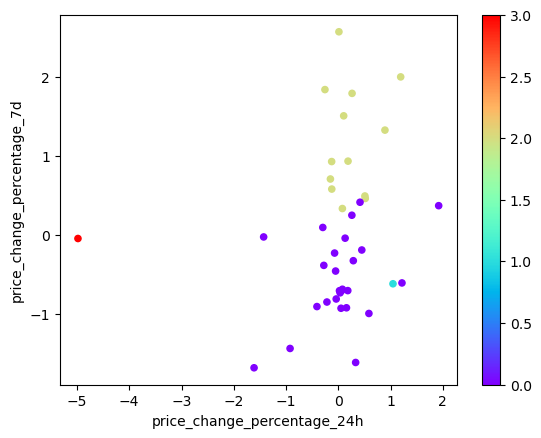

In [201]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

df_k4_crypto_predictions.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c=k4_clusters,
    colormap='rainbow'
)



### Optimize Clusters with Principal Component Analysis.

In [202]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [203]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca_data = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
crypto_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [204]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is `0.89503166`.

In [205]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(crypto_pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
df_crypto_pca['coin_id'] = df_market_data_scaled.index

# Set the coinid column as index
df_crypto_pca = df_crypto_pca.set_index('coin_id')

# Display sample data
df_crypto_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [206]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_crypto_pca)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve for PCA Cluster Analysis'}, xlabel='k'>

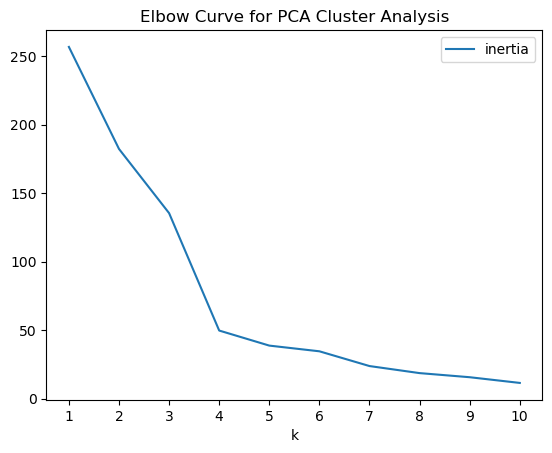

In [207]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_df.plot.line(
    x='k',
    y='inertia',
    title= 'Elbow Curve for PCA Cluster Analysis',
    xticks=k
)


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it doesn't differ. However, when we cluster this data with KMeans and plot it, it will likely show up differently.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [208]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [209]:
# Fit the K-Means model using the PCA data
model.fit(df_crypto_pca)

KMeans(n_clusters=4, random_state=1)

In [214]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_crypto_clusters = model.predict(df_crypto_pca)

# Print the resulting array of cluster values.
pca_crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [211]:
# Create a copy of the DataFrame with the PCA data
pca_crypto_predictions = df_crypto_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_crypto_predictions['CryptoCluster'] = pca_crypto_clusters

# Display sample data
pca_crypto_predictions.head()


,PCA1,PCA2,PCA3,CryptoCluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [212]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_crypto_predictions.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    color='CryptoCluster'
)

:Scatter   [PCA1]   (PCA2,CryptoCluster)

### Determine the Weights of Each Feature on each Principal Component

In [217]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
  

For PCA1, `price_change_percentage_200d` and `price_change_percentage_1y` have the strongest positive influence. 

For PCA2, it's `price_change_percentage_14d` and `price_change_percentage_30d`. 

Finally, for PCA3, the strongest positive influences are `price_change_percentage_7d` and `price_change_percentage_14d`.